# Google Drive 마운트 하기





In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#경로 설정
import os
os.chdir('/content/drive/My Drive/')

In [5]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [7]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 86 kB 4.7 MB/s 
     |████████████████████████████████| 448 kB 58.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


# 키워드 추출

텍스트 데이터 전처리

In [6]:
df = pd.read_csv('/content/drive/MyDrive/data/book_data_analysis.csv', encoding='cp949')
df.head()

,id,title,intro
0,0100023009445_20844891,달러구트 꿈 백화점 12 세트전2권,[달러구트 꿈 백화점 : 주문하신 꿈은 매진입니다]?잠들어야만 입장할 수 있는 독특...
1,10624152_9788958289906,거기 내가 가면 안 돼요2,청소년문학의 아이콘 이금이 작가가 작가 생활 30년 만에 처음 쓴 역사소설. 논 서...
2,11931111_9788963527192,인간행동과 사회환경,▶ 이 책은 인간행동과 사회환경을 다룬 이론서입니다. 인간행동과 사회환경의 기초적이...
3,12518812_9788962571431,평화사상과 통일의 길,『평화사상과 통일의 길』은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명...
4,14450596_9791128812774,프리드리히키틀러큰글씨책이론총서,"『프리드리히 키틀러(큰글씨책)』 은 〈기록체계: 정보 저장의 네트워크〉, 〈문자 독..."


In [7]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [8]:
# ‘id’ 피처에 이를 적용합니다.
df['ko_id'] = df['id'].apply(lambda x: text_cleaning(x))
df.head()

,id,title,intro,ko_id
0,0100023009445_20844891,달러구트 꿈 백화점 12 세트전2권,[달러구트 꿈 백화점 : 주문하신 꿈은 매진입니다]?잠들어야만 입장할 수 있는 독특...,
1,10624152_9788958289906,거기 내가 가면 안 돼요2,청소년문학의 아이콘 이금이 작가가 작가 생활 30년 만에 처음 쓴 역사소설. 논 서...,
2,11931111_9788963527192,인간행동과 사회환경,▶ 이 책은 인간행동과 사회환경을 다룬 이론서입니다. 인간행동과 사회환경의 기초적이...,
3,12518812_9788962571431,평화사상과 통일의 길,『평화사상과 통일의 길』은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명...,
4,14450596_9791128812774,프리드리히키틀러큰글씨책이론총서,"『프리드리히 키틀러(큰글씨책)』 은 〈기록체계: 정보 저장의 네트워크〉, 〈문자 독...",


In [9]:
# ‘title’ 피처에 이를 적용합니다.
df['ko_title'] = df['title'].apply(lambda x: text_cleaning(x))
df.head()

,id,title,intro,ko_id,ko_title
0,0100023009445_20844891,달러구트 꿈 백화점 12 세트전2권,[달러구트 꿈 백화점 : 주문하신 꿈은 매진입니다]?잠들어야만 입장할 수 있는 독특...,,달러구트 꿈 백화점 세트전권
1,10624152_9788958289906,거기 내가 가면 안 돼요2,청소년문학의 아이콘 이금이 작가가 작가 생활 30년 만에 처음 쓴 역사소설. 논 서...,,거기 내가 가면 안 돼요
2,11931111_9788963527192,인간행동과 사회환경,▶ 이 책은 인간행동과 사회환경을 다룬 이론서입니다. 인간행동과 사회환경의 기초적이...,,인간행동과 사회환경
3,12518812_9788962571431,평화사상과 통일의 길,『평화사상과 통일의 길』은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명...,,평화사상과 통일의 길
4,14450596_9791128812774,프리드리히키틀러큰글씨책이론총서,"『프리드리히 키틀러(큰글씨책)』 은 〈기록체계: 정보 저장의 네트워크〉, 〈문자 독...",,프리드리히키틀러큰글씨책이론총서


In [10]:
# ‘title’ 피처에 이를 적용합니다.
df['ko_intro'] = df['intro'].apply(lambda x: text_cleaning(x))
df.head()

,id,title,intro,ko_id,ko_title,ko_intro
0,0100023009445_20844891,달러구트 꿈 백화점 12 세트전2권,[달러구트 꿈 백화점 : 주문하신 꿈은 매진입니다]?잠들어야만 입장할 수 있는 독특...,,달러구트 꿈 백화점 세트전권,달러구트 꿈 백화점 주문하신 꿈은 매진입니다잠들어야만 입장할 수 있는 독특한 마을...
1,10624152_9788958289906,거기 내가 가면 안 돼요2,청소년문학의 아이콘 이금이 작가가 작가 생활 30년 만에 처음 쓴 역사소설. 논 서...,,거기 내가 가면 안 돼요,청소년문학의 아이콘 이금이 작가가 작가 생활 년 만에 처음 쓴 역사소설 논 서 마지...
2,11931111_9788963527192,인간행동과 사회환경,▶ 이 책은 인간행동과 사회환경을 다룬 이론서입니다. 인간행동과 사회환경의 기초적이...,,인간행동과 사회환경,이 책은 인간행동과 사회환경을 다룬 이론서입니다 인간행동과 사회환경의 기초적이고 ...
3,12518812_9788962571431,평화사상과 통일의 길,『평화사상과 통일의 길』은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명...,,평화사상과 통일의 길,평화사상과 통일의 길은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명한다...
4,14450596_9791128812774,프리드리히키틀러큰글씨책이론총서,"『프리드리히 키틀러(큰글씨책)』 은 〈기록체계: 정보 저장의 네트워크〉, 〈문자 독...",,프리드리히키틀러큰글씨책이론총서,프리드리히 키틀러큰글씨책 은 기록체계 정보 저장의 네트워크 문자 독점 시대 축음기와...


In [11]:
from konlpy.tag import Okt
from collections import Counter

# 한국어 약식 불용어사전
korean_stopwords_path = "/content/drive/MyDrive/data/stopword.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [12]:
df['nouns'] = df['ko_intro'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(10871, 7)


,id,title,intro,ko_id,ko_title,ko_intro,nouns
0,0100023009445_20844891,달러구트 꿈 백화점 12 세트전2권,[달러구트 꿈 백화점 : 주문하신 꿈은 매진입니다]?잠들어야만 입장할 수 있는 독특...,,달러구트 꿈 백화점 세트전권,달러구트 꿈 백화점 주문하신 꿈은 매진입니다잠들어야만 입장할 수 있는 독특한 마을...,"[달러, 구트, 백화점, 주문, 매진, 입장, 마을, 손님, 가장, 인기, 온갖, ..."
1,10624152_9788958289906,거기 내가 가면 안 돼요2,청소년문학의 아이콘 이금이 작가가 작가 생활 30년 만에 처음 쓴 역사소설. 논 서...,,거기 내가 가면 안 돼요,청소년문학의 아이콘 이금이 작가가 작가 생활 년 만에 처음 쓴 역사소설 논 서 마지...,"[청소년, 문학, 아이콘, 작가, 작가, 생활, 처음, 역사소설, 마지기, 자작, ..."
2,11931111_9788963527192,인간행동과 사회환경,▶ 이 책은 인간행동과 사회환경을 다룬 이론서입니다. 인간행동과 사회환경의 기초적이...,,인간행동과 사회환경,이 책은 인간행동과 사회환경을 다룬 이론서입니다 인간행동과 사회환경의 기초적이고 ...,"[인간, 행동, 사회, 환경, 이론, 인간, 행동, 사회, 환경, 기초, 전반, 내..."
3,12518812_9788962571431,평화사상과 통일의 길,『평화사상과 통일의 길』은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명...,,평화사상과 통일의 길,평화사상과 통일의 길은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명한다...,"[평화, 사상, 통일, 평화, 사상, 바탕, 한반도, 통일, 설명, 그리스도교, 유..."
4,14450596_9791128812774,프리드리히키틀러큰글씨책이론총서,"『프리드리히 키틀러(큰글씨책)』 은 〈기록체계: 정보 저장의 네트워크〉, 〈문자 독...",,프리드리히키틀러큰글씨책이론총서,프리드리히 키틀러큰글씨책 은 기록체계 정보 저장의 네트워크 문자 독점 시대 축음기와...,"[프리드리히, 키틀러, 글씨, 기록, 체계, 정보, 저장, 네트워크, 문자, 독점,..."


# 연관 분석을 이용한 키워드 분석

연관 키워드 추출

In [13]:
pip install apyori

In [14]:
from apyori import apriori

# 지지도 (supprot): P(A∩B)
result=(list(apriori(df['nouns'], min_support=0.01)))
df=pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))

# 두 단어의 연관성을 나타내며 0.01 지지도 이상 추출
df = df[(df['length'] == 2) &
        (df['support'] >= 0.01)].sort_values(by='support', ascending=False)

df.head(10)

,items,support,ordered_statistics,length
4434,"(사람, 이야기)",0.088676,"[((), (사람, 이야기), 0.08867629472909576, 1.0), ((...",2
2969,"(통해, 대한)",0.087940,"[((), (통해, 대한), 0.08794039186827339, 1.0), ((대...",2
5251,"(작가, 소설)",0.086929,"[((), (작가, 소설), 0.08692852543464263, 1.0), ((소...",2
2797,"(대한, 사회)",0.086745,"[((), (대한, 사회), 0.08674454971943703, 1.0), ((대...",2
2788,"(대한, 사람)",0.079661,"[((), (대한, 사람), 0.0796614846840217, 1.0), ((대한...",2
6174,"(작가, 작품)",0.076810,"[((), (작가, 작품), 0.07680986109833501, 1.0), ((작...",2
5238,"(이야기, 소설)",0.075522,"[((), (이야기, 소설), 0.07552203109189587, 1.0), ((...",2
5252,"(작품, 소설)",0.073590,"[((), (작품, 소설), 0.07359028608223714, 1.0), ((소...",2
4506,"(통해, 사람)",0.072486,"[((), (통해, 사람), 0.07248643179100359, 1.0), ((사...",2
5921,"(작가, 이야기)",0.071291,"[((), (작가, 이야기), 0.07129058964216724, 1.0), ((...",2


In [16]:
pip install networkx

In [17]:
# networkx 그래프 정의
import networkx as nx
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [18]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [28]:
# 레이아웃
pos = nx.circular_layout(G) # 원형
# pos = nx.dodecahedral_layout(G)
# pos = nx.rescale_layout(G)

findfont: Font family ['KoPubDotum'] not found. Falling back to DejaVu Sans.


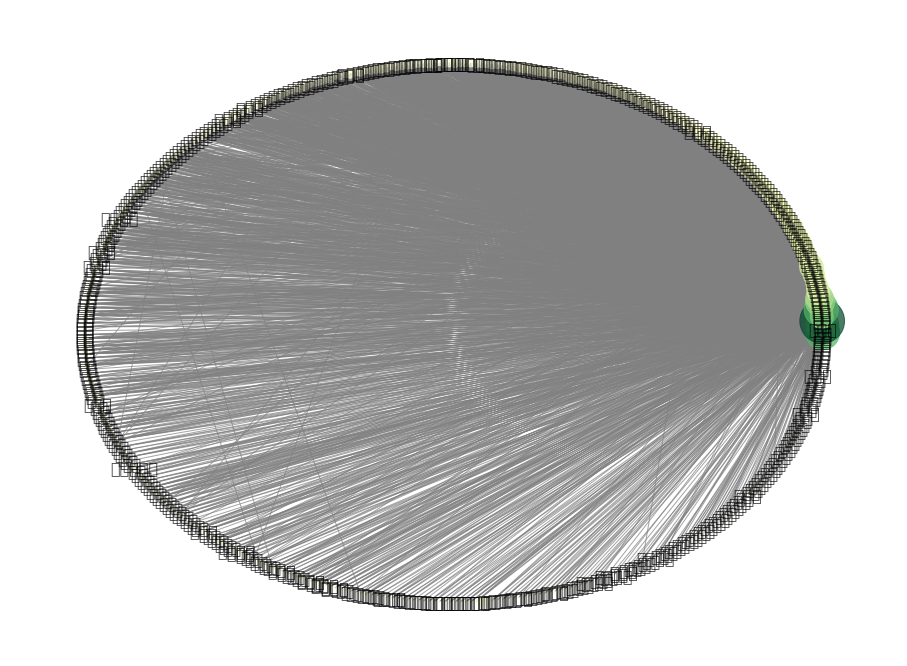

In [24]:
# 네트워크 그래프
plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(G, font_family='KoPubDotum', font_size=16,
                 pos=pos, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.7, edge_color='0.5', cmap=plt.cm.YlGn)
plt.savefig('/content/networkx.png', bbox_inches='tight')